# Classification Model Performance

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/classification_model_performance

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/classification_model_performance


In [2]:
import pandas
import matplotlib.pyplot as plt

## Loading dataset

First, we use pandas to load the dataset from a csv file.

In [3]:
data = pandas.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


### Features-labels split and train-validation split

In [4]:
features = data.drop(["Survived"], axis=1)
labels = data["Survived"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# we fix random_state , to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

In [7]:
features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [8]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### Training model on our dataset


In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Model Evaluation

#### Accuracy

In [10]:
print("Scores of the model")
# model score to print model accuracy
lr_model.score(features_validation, labels_validation)

Scores of the model


0.7696629213483146

#### False Positives, False Negatives and Confusion Matrix

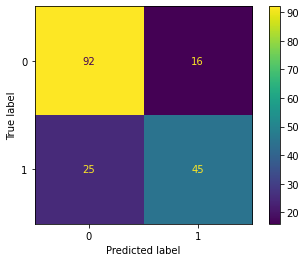

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
val_predictions = lr_model.predict(features_validation)
cm = confusion_matrix(labels_validation, val_predictions, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_model.classes_)
disp.plot() 

In [12]:
cm

array([[92, 16],
       [25, 45]])

#### Recall, Precision and F1-score

In [13]:
from sklearn.metrics import f1_score,recall_score,precision_score

rec_sc=recall_score(labels_validation, val_predictions)
print("rec:",rec_sc)

f1_sc= f1_score(labels_validation, val_predictions)
print("f1_sc:",f1_sc)

pre_sc=precision_score(labels_validation, val_predictions, average=None)
print("pre_sc:",pre_sc)


rec: 0.6428571428571429
f1_sc: 0.6870229007633588
pre_sc: [0.78632479 0.73770492]


### ROC and AUC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


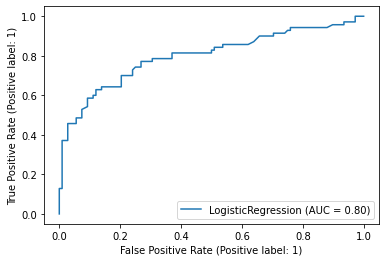

In [14]:
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
# use sklearn plot_roc_curve to plot the ROC and AUC
metrics.plot_roc_curve(lr_model, features_validation, labels_validation)
plt.show()     
